<a href="https://colab.research.google.com/github/ashwin-r-k/Computational-Physics_3labs/blob/main/LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2

## Group 3:


---

Ashwin Kharat	  



In [1]:
#-- This will reset the runtime and clear all variable.
%reset -f
#A new Begining

#-- importing all the necessary Libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
import ipywidgets as widgets
from IPython.display import display, HTML
## --
 
#-- Custom functions to make life easy.
# g3 represent Group 3
# lable class creates a label object which can be used with new plot and multiPlot functions
# lable format is
#1.Legend of the plot that u want to make 
#2.X-axis label,  3. Y-axis label
#3.style of line plotted
#this can all be skipped and a default plot is made with the default label
#newPlot makes a fresh new Figure and plot taking the g3_lable
#formate is (x values , y values , g3_lable object )
# multiPlot can be used repeatedly to plot on the same figure.
#formate is (x values , y values , g3_lable object ).

class label():
  def __init__(self, ll = None ,lx = 'x',ly ='y',style = '-'):
    self.ll = ll    # the lable for legend
    self.lx = lx    # x axis
    self.ly = ly    # y axis
    self.style = style
 
class g3:
    
  def newPlot(x, y, L = label() ):
    fig = plt.figure()
    easy = fig.add_subplot(111)  
    easy.plot( x, y,  L.style, label = L.ll )
    easy.legend()
    plt.xlabel( L.lx )
    plt.ylabel( L.ly )
 
  def multiPlot(x, y, L = label() ):
    plt.plot( x, y, L.style, label = L.ll ,alpha=0.5)
    plt.legend()
    plt.xlabel( L.lx )
    plt.ylabel( L.ly )
#--



##Problem 1 : Implementation of Euler and Euler-Cromer ODE. 

### Part A

Write a function for solving the Newton's laws of motion $$\frac{d^2 x}{dt^2} = a(x, \dot{x}, t),$$ using Euler and Euler-Cromer algorithms. As shown in class, this 2nd order ODE can be broken into a set of 2 coupled 1st order ODEs:

$$ \frac{d}{dt} \begin{pmatrix}x \\ v \end{pmatrix} = \begin{pmatrix} {v} \\ a(x,v,t) \end{pmatrix}$$

The $\texttt{EulerODE}(\, )$ function should take following as input:

a. a list or array containing initial condition for $x$ and $v$ i.e. $[x_0, v_0]$.

b. a list or array with starting time and end time i.e. $[t_0, t_{max}]$.

c. The function to calculate the right-hand side of the above equation. It can be defined with a Python function as follows:

$$\texttt{rhs} \; \Big(x_{k}, v_{k}, t_{k} \Big):$$ 

and return a list containing the velocity and acceleration at time $t_k$:

$$ \texttt{return} \qquad \Big[ v[t_k], \, a[t_k] \Big]$$

Hence the functional form for the $\texttt{EulerODE}$ should be as follows: 

$$\texttt{EulerODE} \Big(\texttt{initCondn}, \; \texttt{tRange}, \; rhs\Big)$$
where $\texttt{initCondn} \equiv [x_0, v_0]$ is a list containing the initial conditions at $t=t_0$ and $\texttt{tRange} \equiv [t_0, t_f]$ is the list containing the time-range to integrate the equations.

Make a similar function for Euler-Cromer algorithm $\texttt{EulerCromerODE}(\, )$. 



#### Solution part A


In [2]:
# Just a BluePrint.

def rhs(xk,vk,tk):
#This is the general definition for any 2nd order vectorised ODE. 
#we are calling another function 'a(xk,vk,tk)' which has the definition for acceleration written.
  return [vk , a(xk,vk,tk)]



def EulerODE(initCondn, tRange, rhs):
  # we could have given a value to dt but wanted user to have a control over it.
  dt = tRange[2]
  time = np.arange(tRange[0], tRange[1] + dt , dt)
  
  position = np.zeros(len(time))
  velocity = np.zeros(len(time))
  
  position[0] = initCondn[0]
  velocity[0] = initCondn[1]

  for i in range(0, len(time)-1):
    position[i+1] = position[i] + rhs(position[i],velocity[i], time[i] )[0] * dt
    velocity[i+1] = velocity[i] + rhs(position[i],velocity[i], time[i] )[1] * dt

  return position, velocity


def EulerCromerODE(initCondn, tRange, rhs):
  
  dt = tRange[2]
  time = np.arange(tRange[0], tRange[1] + dt , dt)
  position = np.zeros(len(time))
  velocity = np.zeros(len(time))
  
  position[0] = initCondn[0]
  velocity[0] = initCondn[1]

  for i in range(0, len(time)-1):
    velocity[i+1] = velocity[i] + rhs(position[i],velocity[i], None )[1] * dt
    position[i+1] = position[i] + rhs(position[i+1],velocity[i+1], None )[0] * dt

  return position, velocity


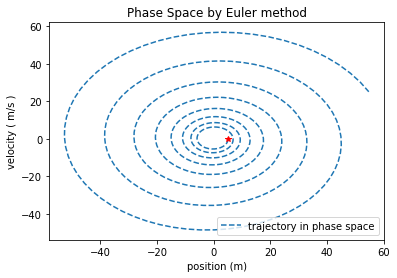

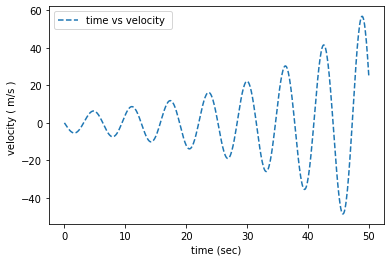

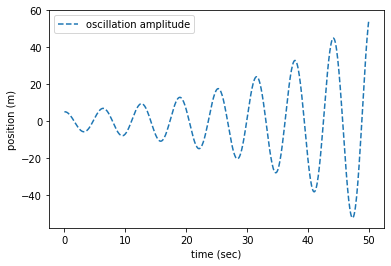

In [3]:
# An example code is written for a spring mass system with the format given above.
def a(xk,vk,t):
  mass = 1 #kg
  c = 0 # damping constant taking zero for simple case / demo purpose

  k = 1 # spring constant
  return -1/mass*(c*vk + k* xk )
# -- Initialization
time_0 = 0 
time_max = 50
time_step = 1/10 # 10th part of a second 
position_0 = 5 # in meters difference from rest position
velocity_0 = 0        # angular velocity            
#--

initCondn = [position_0, velocity_0]
tRange = [time_0, time_max, time_step]
dt = tRange[2]
time = np.arange(tRange[0], tRange[1] + dt , dt)

# calling euler fn to solve for the given initial condition.
position, velocity = EulerODE(initCondn, tRange, rhs)

lable = label('trajectory in phase space','position (m)','velocity ( m/s )','--')
g3.newPlot(position, velocity,lable)
plt.plot(position[0], velocity[0],'*r')
#plt.legend()
plt.title('Phase Space by Euler method')
plt.show()

lable = label('time vs velocity ','time (sec)','velocity ( m/s ) ','--')
g3.newPlot(time, velocity,lable)

lable = label('oscillation amplitude','time (sec)','position (m)','--')
g3.newPlot(time, position  ,lable)


#### Simulation of SHO : Euler.

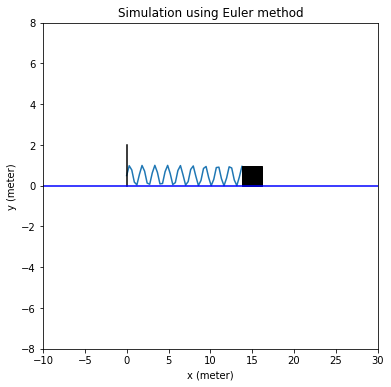

In [4]:

x_data = []
y_data = []
l = 10 # length of unstretched spring.

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(xlim=(-l, l*3),ylim=(-l*0.8, l*0.8 ))
line, = ax.plot(0, 0)
dot, = ax.plot(0, 0, 'sk', markersize = 20 )
plt.plot( np.zeros(10),np.linspace(0,2,10), '-k')
plt.plot( np.linspace(-10,30,10) ,np.zeros(10), '-b')

plt.xlabel('x (meter)')
plt.ylabel('y (meter)')
plt.title('Simulation using Euler method')

def animation_frame(i):

  x_data = np.linspace(0, (l + position[i]), 50)
  temp = 0.5 * np.sin(x_data * (l*2*np.pi)/(l + position[i]))
  y_data = temp + 0.5 # just puting spring in place.
  
  line.set_xdata(x_data)
  line.set_ydata(y_data)
  
  dot.set_ydata(0.5)
  dot.set_xdata((l + position[i]))

  return line

# simple plot is just the initial condition.
# Animination is a video.

animation_vid = animation.FuncAnimation(fig, func = animation_frame, frames = np.arange(0, len(time)-1 , 1) , interval= dt*1000 )
HTML(animation_vid.to_html5_video())

The above numerical solution is using the euler method which is why we are getting an error. The solution shows that an extra energy is pumped into the system which is not.


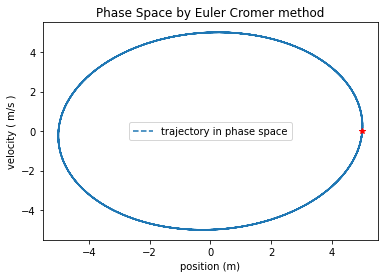

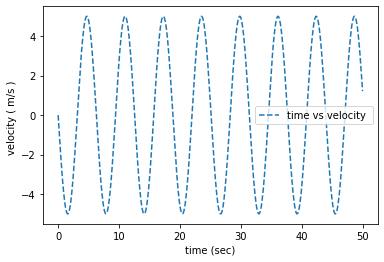

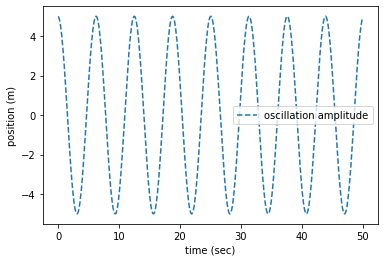

In [5]:

position, velocity = EulerCromerODE(initCondn, tRange, rhs)

lable = label('trajectory in phase space','position (m)','velocity ( m/s )','--')
g3.newPlot(position, velocity,lable)
plt.plot(position[0], velocity[0],'*r')
#plt.legend()
plt.title('Phase Space by Euler Cromer method')
plt.show()

lable = label('time vs velocity ','time (sec)','velocity ( m/s ) ','--')
g3.newPlot(time, velocity,lable)

lable = label('oscillation amplitude','time (sec)','position (m)','--')
g3.newPlot(time, position  ,lable)

Here using the Euler cromer method we get the proper phase space trajectory and the energy of the system is conserved. Here the velocity and position shows an oscillatory variation with a phase difference of  $π/2$  i.e. the two are in quadrature just as expected for a Simple harmonic oscillator.

#### Simulation of SHO: Euler Cromer.

> Indented block



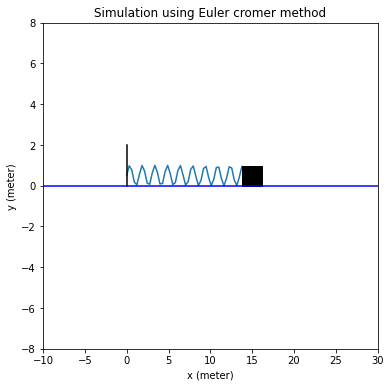

In [6]:

x_data = []
y_data = []
l = 10 # length of unstretched spring.

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(xlim=(-l, l*3),ylim=(-l*0.8, l*0.8 ))
line, = ax.plot(0, 0)
dot, = ax.plot(0, 0, 'sk', markersize = 20 )
plt.plot( np.zeros(10),np.linspace(0,2,10), '-k')
plt.plot( np.linspace(-10,30,10) ,np.zeros(10), '-b')

plt.xlabel('x (meter)')
plt.ylabel('y (meter)')
plt.title('Simulation using Euler cromer method')

def animation_frame(i):

  x_data = np.linspace(0, (l + position[i]), 50)
  temp = 0.5 * np.sin(x_data * (l*2*np.pi)/(l + position[i]))
  y_data = temp + 0.5 # just puting spring in place.
  
  line.set_xdata(x_data)
  line.set_ydata(y_data)
  
  dot.set_ydata(0.5)
  dot.set_xdata((l + position[i]))

  return line

# simple plot is just the initial condition
# Animination is a video.

animation_vid = animation.FuncAnimation(fig, func = animation_frame, frames = np.arange(0, len(time)-1 , 1) , interval= dt*1000 )
HTML(animation_vid.to_html5_video())

In [7]:
HTML(animation_vid.to_html5_video())

### Part B

Use these functions to solve for the simple harmonic pendulum:
$$\frac{d^2 \theta}{dt^2} =  − k \, sin \theta,$$
with boundary conditions:
at $t = 0$, $\theta = \pi/4, \dot{\theta} = 0$. Note that the initial amplitude is quite large, so it is not really a simple harmonic oscillator.

Plot $\theta$ Vs $t$ and the phase space trajectory. 

Explore the system for small oscillations and explain any qualitative difference from the previous case. (For this choose suitable boundary conditions).



#### Solution using Euler Method.
We are solving an ODE of the form
$$ \frac{d\vec y}{dt} = \vec f$$

For a simple harmonic pendulum, the equation of motion is second-order ODE:

$$\frac{d^2 \theta}{dt^2} =  − k \, sin \theta,$$

we can vectorize this as 

$$
\frac{d}{dt}
\begin{bmatrix} 
\theta \\ \omega 
\end{bmatrix}
= 
\begin{bmatrix}
\omega \\ - k sin(\theta)
\end{bmatrix}
$$

\\

The initial condition is given:
$ \vec y_0 = \vec y(t=0) 
    = \begin{bmatrix}
    \theta_0 \\ \omega_0
    \end{bmatrix}
    = \begin{bmatrix}
    \pi/4 \\ 0.0
    \end{bmatrix}
$


In [8]:
# Functions used in Part B solution.
# the Functions are created using same principles from Part A.
def rhs(theta, omega, time):
  g = 9.8
  r = 1
  k = g/r
  return [omega, -k * np.sin(theta)]

def EulerODE(initCondn, tRange, rhs):
 
  dt = tRange[2]
  time = np.arange(tRange[0], tRange[1] + dt , dt)
  theta = np.zeros(len(time))
  omega = np.zeros(len(time))
  
  theta[0] = initCondn[0]
  omega[0] = initCondn[1]

  for i in range(0, len(time)-1):
    theta[i+1] = theta[i] + rhs(theta[i],omega[i], None )[0] * dt
    omega[i+1] = omega[i] + rhs(theta[i],omega[i], None )[1] * dt

  return theta, omega


def EulerCromerODE(initCondn, tRange, rhs):
  
  dt = tRange[2]
  time = np.arange(tRange[0], tRange[1] + dt , dt)
  theta = np.zeros(len(time))
  omega = np.zeros(len(time))
  
  theta[0] = initCondn[0]
  omega[0] = initCondn[1]

  for i in range(0, len(time)-1):
    omega[i+1] = omega[i] + rhs( theta[i], omega[i] , None )[1] * dt
    theta[i+1] = theta[i] + rhs( theta[i+1], omega[i+1] , None )[0] * dt
  return theta, omega


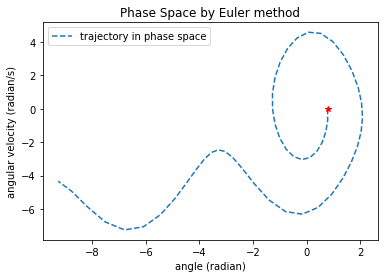

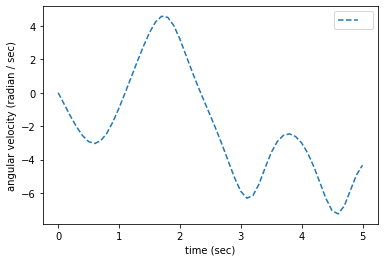

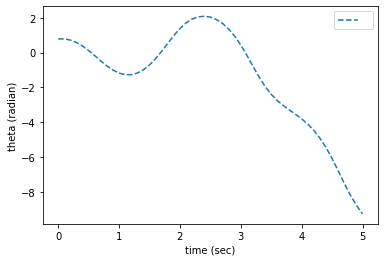

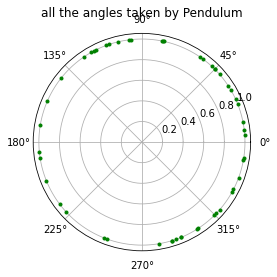

In [9]:
time_0 = 0 
time_max = 5
time_step = 1/10 # 10th part of a second 

theta_0 = np.pi/4 
omega_0 = 0        # angular velocity            

initCondn = [theta_0, omega_0]
tRange = [time_0, time_max, time_step]

dt = tRange[2]
time = np.arange(tRange[0], tRange[1] + dt , dt)

theta, omega = EulerODE(initCondn, tRange, rhs)

lable = label('trajectory in phase space','angle (radian)','angular velocity (radian/s)','--')
g3.newPlot(theta, omega,lable)

plt.plot(theta[0], omega[0],'*r')
#plt.legend()
plt.title('Phase Space by Euler method')
plt.show()

lable = label(' ','time (sec)','angular velocity (radian / sec)','--')
g3.newPlot(time, omega,lable)

lable = label(' ','time (sec)','theta (radian)','--')
g3.newPlot(time, theta  ,lable)
plt.show()

plt.polar(theta, np.ones(len(theta)), 'g.') 
plt.title("all the angles taken by Pendulum")

#saving the data in dictionary form to use later for calculating energy
euelrSolution = {'theta' : theta, 'omega': omega}

We can see the angle taken by Pendulum are higher then the initial angle, which should not be posible.
We get this error because of euler method , as it is just an approximation.

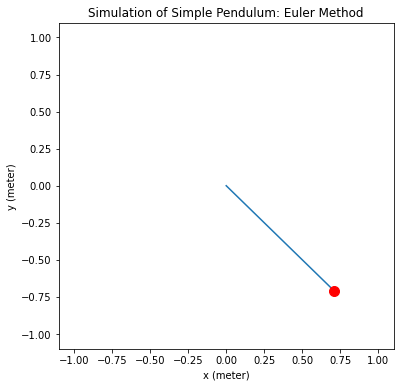

In [10]:

x_data = []
y_data = []
r = 1

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(xlim=(-r*1.1, r*1.1 ), ylim=(-r*1.1, r*1.1))
line, = ax.plot(0, 0)
dot, = ax.plot(0, 0,'ro', markersize = 10 )
plt.xlabel('x (meter)')
plt.ylabel('y (meter)')
plt.title("Simulation of Simple Pendulum: Euler Method")

def animation_frame(i):
  x_data = np.linspace(0, r * np.sin(theta[i]), 10)
  y_data = np.linspace(0, - r * np.cos(theta[i]) ,10 )
  line.set_xdata(x_data)
  line.set_ydata(y_data)

  dot.set_xdata(r * np.sin(theta[i]))
  dot.set_ydata(- r * np.cos(theta[i]))

  return line, dot

animation_vid = animation.FuncAnimation(fig, func = animation_frame, frames = np.arange(0, len(time)-1 , 1) , interval= dt*1000 )


In [11]:
HTML(animation_vid.to_html5_video())

####Solution using Euler-Cromer algorithm

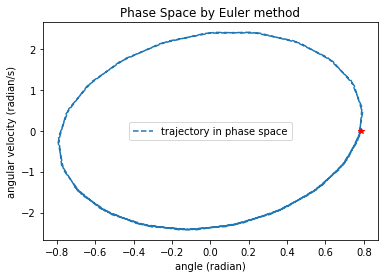

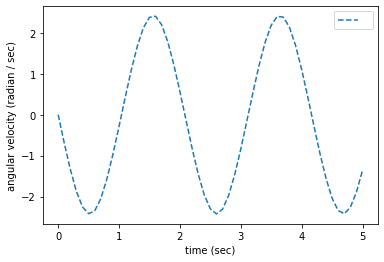

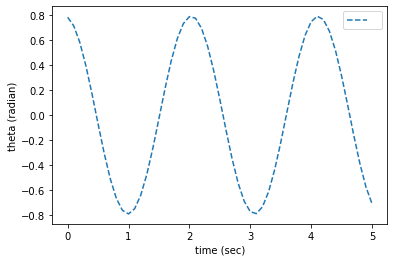

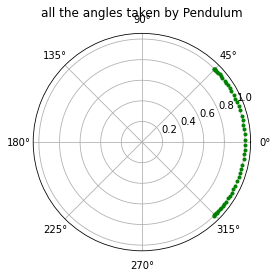

In [12]:
time_0 = 0 
time_max = 5
time_step = 1/10 # 10th part of a second 
 
theta_0 = np.pi/4
omega_0 = 0        # angular velocity            

initCondn = [theta_0, omega_0]
tRange = [time_0, time_max, time_step]

dt = tRange[2]
time = np.arange(tRange[0], tRange[1] + dt , dt)

theta, omega = EulerCromerODE(initCondn, tRange, rhs)

lable = label('trajectory in phase space','angle (radian)','angular velocity (radian/s)','--')
g3.newPlot(theta, omega,lable)

plt.plot(theta[0], omega[0],'*r')
#plt.legend()
plt.title('Phase Space by Euler method')
plt.show()

lable = label(' ','time (sec)','angular velocity (radian / sec)','--')
g3.newPlot(time, omega,lable)

lable = label(' ','time (sec)','theta (radian)','--')
g3.newPlot(time, theta  ,lable)
plt.show()

plt.polar(theta, np.ones(len(theta)), 'g.') 
plt.title("all the angles taken by Pendulum")

#saving the data in dictionary form to use later for calculating energy
euelrCromerSolution = {'theta' : theta, 'omega': omega}

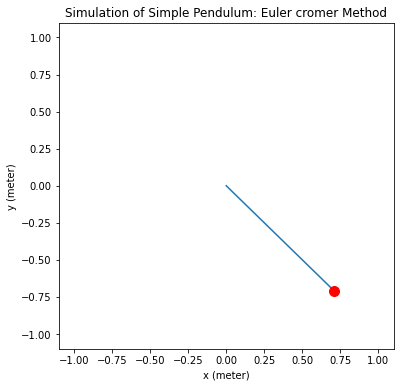

In [13]:

x_data = []
y_data = []
r = 1 # meter
#length of pendulume rod

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(xlim=(-r*1.1, r*1.1 ), ylim=(-r*1.1, r*1.1))
line, = ax.plot(0, 0)
dot, = ax.plot(0, 0,'ro', markersize = 10 )
plt.xlabel('x (meter)')
plt.ylabel('y (meter)')
plt.title("Simulation of Simple Pendulum: Euler cromer Method")

def animation_frame(i):
  x_data = np.linspace(0, r * np.sin(theta[i]), 10)
  y_data = np.linspace(0, - r * np.cos(theta[i]) ,10 )
  line.set_xdata(x_data)
  line.set_ydata(y_data)

  dot.set_xdata(r * np.sin(theta[i]))
  dot.set_ydata(- r * np.cos(theta[i]))

  return line, dot

animation_vid = animation.FuncAnimation(fig, func=animation_frame, frames = np.arange(0, len(time)-1 , 1) , interval= dt*1000 )

In [14]:
HTML(animation_vid.to_html5_video())

### Part C
Plot the total energy as a function of time for both the methods. Notice any oscillations?

####Solution Energy

$\text{kinetic energy}  =\frac{m}{2}(\dot r ^2 + r^2\dot \theta ^2)$

$\text{potential energy} = m g (h - r * cos(\theta) )$


Text(0, 0.5, 'total energy (joule)')

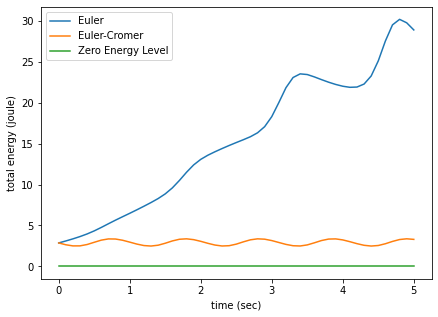

In [15]:
# befor running this make sure that the initial condition is the same for both Methods above.

mass = 1 # kg
height = radius = 1 # meter
g = 9.8 #m/s

plt.figure(figsize=(7,5))

energy_euler = mass / 2 *( 0 +radius**2 * np.array(euelrSolution.get('omega'))**2 ) + mass * g * (height - radius*np.cos(euelrSolution.get('theta')))

energy_eulerCromer = mass / 2 *( 0 +radius**2 * np.array(euelrCromerSolution.get('omega'))**2 ) + mass * g * (height - radius* np.cos(euelrCromerSolution.get('theta')))

plt.plot(time, energy_euler, label='Euler')
plt.plot(time, energy_eulerCromer, label='Euler-Cromer')
plt.plot(time, np.zeros(len(time)), label='Zero Energy Level')

plt.legend()
plt.xlabel('time (sec)')
plt.ylabel('total energy (joule)')

The total energy of a system executing simple harmonic motion remains constant i.e. remains conserved. The oscillations seen in the graph are due to the $ r * cos(\theta)$ term in the potential energy. It is observed that increasing the radius gives more oscillations in the total energy graph.  
For small oscillations,
$\sin\theta$ can be approximated to $\theta$ and $\cos\theta$ as 1.
Hence the equation of motion will be:

$$\frac{d^2 \theta}{dt^2} =  − k \,\theta$$ 


##Problem 2: Exploring Liouville's theorem with symplectic integrators


### Part A

The Euler and Euler-Cromer algorithms define a map from the $n^{th} \rightarrow (n+1)^{th}$ time steps. For a Simple Harmonic Oscillator (SHO), calculate the Jacobian of the transformation.
For this, explain why Euler algorithm is not suitable for solving the Newton's equations of motion? 


####Solution
For a Simple Harmonic Oscillator, Euler algorithm is not suitable for solving Newton's equations of motion because along with inducing error in the solution due to cancellation of higher-order differential terms, it does not conserve the energy of the system. Euler algorithm is unstable since the trajectory produced by the algorithm spirals continually outwards away from the exact solution. This means that the Euler algorithm does not conserve energy. In the SHO problem we saw that in the Euler method, the object’s maximum displacement and maximum speed are steadily increasing, so its total energy must also be increasing.\
According to Liouville’s Theorem, a conservative system (such as simple harmonic oscillator) must preserve the volume (or area) occupied by an ensemble of trajectories in phase space. The system evolves with time and the cluster of points move through phase space but the region containing the points remains constant. 
In the Euler method, this region in phase space grows in size with the passage of time. 
For SHO, the transformation in the Euler method is given by the set of below equations:

$x_{k+1} = x_k + v_{k}\Delta t$\
$v_{k+1} = v_k -x_{k} \frac{k}{m} \Delta t$ 

If we treat the above equations as a two-dimensional map, then this map will preserve phase space volume if and only if the Jacobian of the map is equal to unity. The Jacobian of this transformation is given by: 

$J = \begin{pmatrix} {\frac{\partial x_{n+1}}{\partial x_{n}}} & {\frac{\partial x_{n+1}}{\partial v_{n}}}\\ {\frac{\partial v_{n+1}}{\partial x_{n}}} & {\frac{\partial v_{n+1}}{\partial v_{n}}} \end{pmatrix}$
$= \begin{pmatrix} 1 & \Delta t \\ -\frac{k}{m} \Delta t & 1\end{pmatrix}$

$ = 1+\frac{k}{m} \Delta t^2$

Thus in contradiction to Liouville’s Theorem, the Euler algorithm does not preserve phase space volume and grows in size with time.
Hence it is not suitable for solving Newton's equations of motion.\
The transformation equations for SHO in the case of Euler-Cromer method are given by: 


$x_{k+1} = x_k + v_{k+1}\Delta t$\
$v_{k+1} = v_k -x_{k} \frac{k}{m} \Delta t$

The Jacobian of this transformation is given by: 

$J = \begin{pmatrix} {\frac{\partial x_{n+1}}{\partial x_{n}}} & {\frac{\partial x_{n+1}}{\partial v_{n}}}\\ {\frac{\partial v_{n+1}}{\partial x_{n}}} & {\frac{\partial v_{n+1}}{\partial v_{n}}} \end{pmatrix}$
$= \begin{pmatrix} 1-\frac{k}{m} \Delta t^2 & \Delta t \\ -\frac{k}{m} \Delta t & 1\end{pmatrix}$
$ = 1$


Hence Euler-Cromer method preserves the phase space volume and conserves energy for SHO system.

### Part B
For an SHO, consider a small square element of phase-space area at $t = 0$ whose corners are labelled A, B, C and D respectively. In this exercise, we would like to follow the area enclosed as the system evolves in time. 

One way to do this is to evolve the four different initial conditions in time and plot the resultant polygon in the phase-space after regular intervals of time. For a conserved system, we expect this area conserved in time. For a symplectic solver (like Euler-Cromer with a global accuracy of $\mathcal{O} (\Delta t)$), this is true. However, this is not for the Euler algorithm.


__Alternately__,  consider the trajectory of a cloud of points through phase space. Show that as the cloud stretches in one coordinate – $p$ say – it shrinks in the corresponding ${q}$  direction so that the product ${ \Delta p\,\Delta q} $  remains constant.

####Solution

In [16]:
def rhs(position, velocity, time):
  
  #k is the spring constant  
  k = 9.8 #N·m−1
  m =1.   #mass kg  
  return [velocity, -k /m * position]

#just name a class to store all functions
# this are the same definations frome above
#for using the class/object method to make code simple.

# as the following code is written with generalized functions 
# the theta and omega can be and are  used alternatively for position and velocity and vice-versa

class Algorithms():
  def __init__(self, initCondn , tRange, rhs  ):
    self.initCondn = initCondn 
    self.tRange = tRange   
    self.rhs = rhs   

  def EulerODE(self):
  
    dt = self.tRange[2]
    time = np.arange(self.tRange[0], self.tRange[1] + dt , dt)
    theta = np.zeros(len(time))
    omega = np.zeros(len(time))
    
    theta[0] = self.initCondn[0]
    omega[0] = self.initCondn[1]

    for i in range(0, len(time)-1):
      theta[i+1] = theta[i] + self.rhs(theta[i],omega[i], None )[0] * dt
      omega[i+1] = omega[i] + self.rhs(theta[i],omega[i], None )[1] * dt

    return theta, omega

  def EulerCromerODE(self):
    
    dt = self.tRange[2]
    time = np.arange(self.tRange[0], self.tRange[1] + dt , dt)
    theta = np.zeros(len(time))
    omega = np.zeros(len(time))
    
    theta[0] = self.initCondn[0]
    omega[0] = self.initCondn[1]

    for i in range(0, len(time)-1):
      omega[i+1] = omega[i] + self.rhs( theta[i], omega[i] , None )[1] * dt
      theta[i+1] = theta[i] + self.rhs( theta[i+1], omega[i+1] , None )[0] * dt
    return theta, omega


 


##### Euler Method

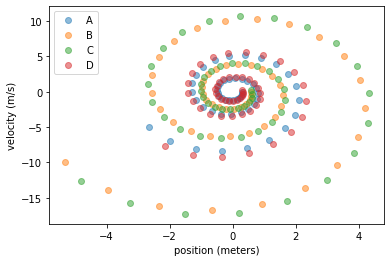

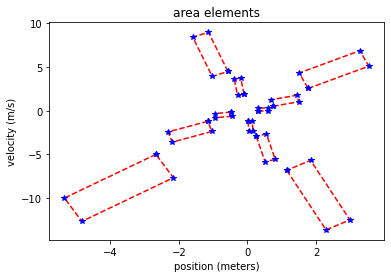

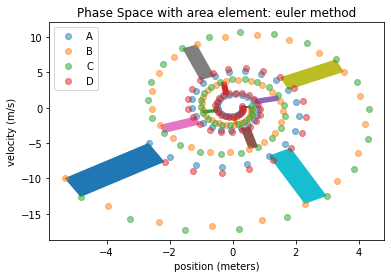

In [17]:
time_0 = 0 
time_max = 5
time_step = 1/10 # 10th part of a second 

position = 0.3 # meters
velocity = 0.3 # m/s
dp = 0.1


#all the values are sored in dictionary.
phaseSpace = {}

#giving initial values to A,B,C,D 
position_0 = position 
velocity_0 = 0                 
AinitCondn = [position_0, velocity_0]

position_0 = 2*position
velocity_0 = 0                    
BinitCondn = [position_0, velocity_0]

position_0 = 2 * position
velocity_0 = 1 * velocity                
CinitCondn = [position_0, velocity_0]


position_0 = 1*position
velocity_0 = 1*velocity                 
DinitCondn = [position_0, velocity_0]

tRange = [time_0, time_max, time_step]
dt = tRange[2]
time = np.arange(tRange[0], tRange[1] + dt , dt)

A = Algorithms(AinitCondn, tRange, rhs)
B = Algorithms(BinitCondn, tRange, rhs)
C = Algorithms(CinitCondn, tRange, rhs)
D = Algorithms(DinitCondn, tRange, rhs)


# all lines below are just to make the plots.
fig = plt.figure()

lable = label('A','position (meters)','velocity (m/s)','o')
phaseSpace['A_theta'],phaseSpace['A_omega'] = theta, omega = A.EulerODE()
g3.multiPlot(theta, omega,lable)

lable = label('B','position (meters)','velocity (m/s)','o')
phaseSpace['B_theta'],phaseSpace['B_omega'] = theta, omega = B.EulerODE()
g3.multiPlot(theta, omega,lable)

lable = label('C','position (meters)','velocity (m/s)','o')
phaseSpace['C_theta'],phaseSpace['C_omega'] = theta, omega = C.EulerODE()
g3.multiPlot(theta, omega,lable)

lable = label('D','position (meters)','velocity (m/s)','o')
phaseSpace['D_theta'],phaseSpace['D_omega'] = theta, omega = D.EulerODE()
g3.multiPlot(theta, omega,lable)

skip = 5
x = []
y = []
areaE = list()
fig = plt.figure()
#plt.axes(xlim=(-5,5), ylim=(-5,5))
plt.figsize=(10,10)

#This follow definations is to find are of any polygon.
#Only this folling 2 lines taken from online Q/A source (stackoverflow).
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
#---

for i in range(0,len(phaseSpace['A_theta']), skip):
  x =  [phaseSpace['A_theta'][i],phaseSpace['B_theta'][i],phaseSpace['C_theta'][i],phaseSpace['D_theta'][i],phaseSpace['A_theta'][i]]
  y = [phaseSpace['A_omega'][i],phaseSpace['B_omega'][i],phaseSpace['C_omega'][i],phaseSpace['D_omega'][i],phaseSpace['A_omega'][i]]  
  areaE.append(PolyArea(x[:4],y[:4]))
  plt.plot(x,y,'--r')
  plt.plot(x,y,'*b')

plt.xlabel('position (meters)')
plt.ylabel('velocity (m/s)')
plt.title('area elements')
plt.show()

skip = 5
for i in range(0,len(phaseSpace['A_theta']), skip):
  x =  [phaseSpace['A_theta'][i],phaseSpace['B_theta'][i],phaseSpace['C_theta'][i],phaseSpace['D_theta'][i],phaseSpace['A_theta'][i]]
  y = [phaseSpace['A_omega'][i],phaseSpace['B_omega'][i],phaseSpace['C_omega'][i],phaseSpace['D_omega'][i],phaseSpace['A_omega'][i]]  
  plt.fill(x[:4],y[:4])

lable = label('A','position (meters)','velocity (m/s)','o')
phaseSpace['A_theta'],phaseSpace['A_omega'] = theta, omega = A.EulerODE()
g3.multiPlot(theta, omega,lable)

lable = label('B','position (meters)','velocity (m/s)','o')
phaseSpace['B_theta'],phaseSpace['B_omega'] = theta, omega = B.EulerODE()
g3.multiPlot(theta, omega,lable)

lable = label('C','position (meters)','velocity (m/s)','o')
phaseSpace['C_theta'],phaseSpace['C_omega'] = theta, omega = C.EulerODE()
g3.multiPlot(theta, omega,lable)

lable = label('D','position (meters)','velocity (m/s)','o')
phaseSpace['D_theta'],phaseSpace['D_omega'] = theta, omega = D.EulerODE()
g3.multiPlot(theta, omega,lable)

plt.title('Phase Space with area element: euler method')
plt.show()

##### Euler Cromer Method

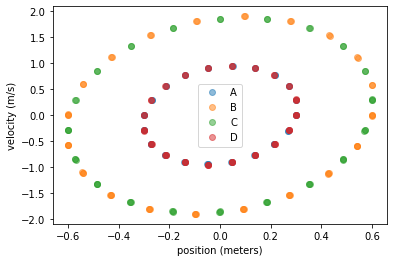

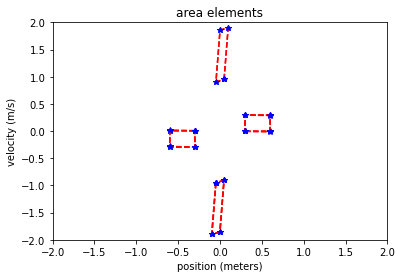

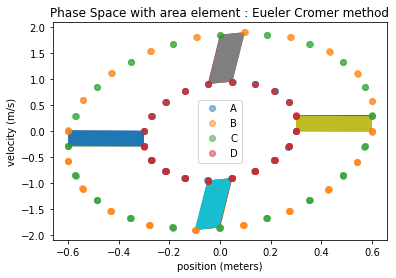

In [18]:

lable = label('A','position (meters)','velocity (m/s)','o')
phaseSpace['A_theta'],phaseSpace['A_omega'] = theta, omega = A.EulerCromerODE()
g3.multiPlot(theta, omega,lable)

lable = label('B','position (meters)','velocity (m/s)','o')
phaseSpace['B_theta'],phaseSpace['B_omega'] = theta, omega = B.EulerCromerODE()
g3.multiPlot(theta, omega,lable)

lable = label('C','position (meters)','velocity (m/s)','o')
phaseSpace['C_theta'],phaseSpace['C_omega'] = theta, omega = C.EulerCromerODE()
g3.multiPlot(theta, omega,lable)

lable = label('D','position (meters)','velocity (m/s)','o')
phaseSpace['D_theta'],phaseSpace['D_omega'] = theta, omega = D.EulerCromerODE()
g3.multiPlot(theta, omega,lable)

skip = 5
x = []
y = []
areaEC = list()
fig = plt.figure()
plt.axes(xlim=(-2,2), ylim=(-2,2))
plt.figsize=(10,10)

def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

for i in range(0,len(phaseSpace['A_theta']), skip):
  x =  [phaseSpace['A_theta'][i],phaseSpace['B_theta'][i],phaseSpace['C_theta'][i],phaseSpace['D_theta'][i],phaseSpace['A_theta'][i]]
  y = [phaseSpace['A_omega'][i],phaseSpace['B_omega'][i],phaseSpace['C_omega'][i],phaseSpace['D_omega'][i],phaseSpace['A_omega'][i]]  
  areaEC.append(PolyArea(x[:4],y[:4]))
  plt.plot(x,y,'--r')
  plt.plot(x,y,'*b')
plt.xlabel('position (meters)')
plt.ylabel('velocity (m/s)')
plt.title('area elements')
plt.show()
for i in range(0,len(phaseSpace['A_theta']), skip):
  x =  [phaseSpace['A_theta'][i],phaseSpace['B_theta'][i],phaseSpace['C_theta'][i],phaseSpace['D_theta'][i],phaseSpace['A_theta'][i]]
  y = [phaseSpace['A_omega'][i],phaseSpace['B_omega'][i],phaseSpace['C_omega'][i],phaseSpace['D_omega'][i],phaseSpace['A_omega'][i]]  
  plt.fill(x[:4],y[:4])

lable = label('A','position (meters)','velocity (m/s)','o')
phaseSpace['A_theta'],phaseSpace['A_omega'] = theta, omega = A.EulerCromerODE()
g3.multiPlot(theta, omega,lable)

lable = label('B','position (meters)','velocity (m/s)','o')
phaseSpace['B_theta'],phaseSpace['B_omega'] = theta, omega = B.EulerCromerODE()
g3.multiPlot(theta, omega,lable)

lable = label('C','position (meters)','velocity (m/s)','o')
phaseSpace['C_theta'],phaseSpace['C_omega'] = theta, omega = C.EulerCromerODE()
g3.multiPlot(theta, omega,lable)

lable = label('D','position (meters)','velocity (m/s)','o')
phaseSpace['D_theta'],phaseSpace['D_omega'] = theta, omega = D.EulerCromerODE()
g3.multiPlot(theta, omega,lable)

plt.title('Phase Space with area element : Eueler Cromer method')
plt.show()

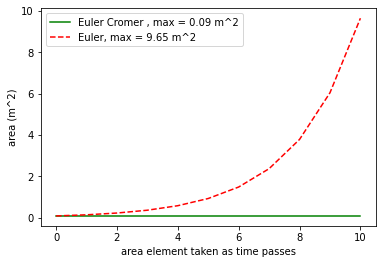

In [19]:
#The area is not calculated for all elements just for the coloured ones above.
plt.plot(range(len(areaEC)),areaEC,'-g',label ="Euler Cromer , max = {0} m^2".format(round(max(areaEC),2)))
plt.plot(range(len(areaE)),areaE,'--r',label ="Euler, max = {0} m^2".format(round(max(areaE),2)))
plt.legend()
plt.xlabel('area element taken as time passes')
plt.ylabel('area (m^2)')
plt.show()

The area elements generated by choosing four initial conditions and evolving (numerically solving) in time results in an increasing area when the Euler method is used.
and when we use the Euler cromer method the area is conserved.


##Problem 3: Linearly-damped harmonic oscillator

In the real world, all classical harmonic oscillators have some form of damping that converts their mechanical energy into heat and eventually brings the system to rest. The simplest way to represent such an effect is to add a linear term $−by$ to the simple harmonic oscillator corresponding to a frictional force that is proportional to the velocity, 
\begin{eqnarray}
\dot{x} &=& v, \\
\dot{v} &=& -x.
\end{eqnarray}

The resulting system is called a damped harmonic oscillator, and b (if positive) is the damping constant. It describes the exponential rate at which orbits spiral into the origin of the phase-space at $(0,0)$ and is related to the $Q$ (quality factor) of the oscillator by $b = 1/Q$. The $Q$ of an oscillator is the number of radians of oscillation required for the energy to decay to $1/e$ of its original value. A system with $Q = 1/2$ (or $b = 2$) is critically damped, and smaller values of $Q$ (or $b > 2$) do not oscillate, but they rapidly approach the origin.

It seems that it should be possible to eliminate the $b$ in above by a linear rescaling of $x$, $v$, and $t$, but that cannot be done as simple algebra shows. 

This system is special in that it has _two distinct time-scales_, the damping rate and the frequency of oscillation, and the parameter $b$ controls their ratio.

Write a code to plot $x(t)$, $v(t)$ and phase-space trajectories for different values of the quality factor (demonstrating underdamped, critically damped and overdamped behaviour of this oscillator). Use both the Euler and Euler-Cromer algorithms. Write down an expression for the determinant of the Jacobian $J$ that maps $(x_n, v_n) \rightarrow (x_{n+1}, v_{n+1})$ in both the cases.

The damped harmonic oscillator is an example of a _dissipative system_. For $b>0$ is it time-reversible? Explain your answer.



#### SOLUTION:
We are solving  $\frac{d^2x}{dt^2}= −\frac{k}{m}x -bv$\
We can vectorize it in the form

$$ \frac{d \vec y}{dt} = \vec f$$

Explicitly:
$$
\frac{d}{dt}
\begin{bmatrix}
x \\
v
\end{bmatrix}
=
\begin{bmatrix}
v \\
-\frac{k}{m}x - bv
\end{bmatrix}
$$

For Damped SHO, the tranformation in Euler method is given by the set of below equations:

$x_{k+1} = x_k + v_{k}\Delta t$\
$v_{k+1} = v_k -x_{k} \frac{k}{m} \Delta t -bv_k \Delta t$ 

The Jacobian of this transformation is given by: 

$J = \begin{pmatrix} {\frac{\partial x_{n+1}}{\partial x_{n}}} & {\frac{\partial x_{n+1}}{\partial v_{n}}}\\ {\frac{\partial v_{n+1}}{\partial x_{n}}} & {\frac{\partial v_{n+1}}{\partial v_{n}}} \end{pmatrix}$
$= \begin{pmatrix} 1 & \Delta t \\ -\frac{k}{m} \Delta t & 1 - b\Delta t\end{pmatrix}$

$ = 1- b\Delta t+\frac{k}{m} \Delta t^2$

The transformation equations for SHO in the case of Euler-Cromer method are given by: 

$x_{k+1} = x_k + v_{k+1}\Delta t$\
$v_{k+1} = v_k -x_{k} \frac{k}{m} \Delta t-bv_k \Delta t$

The Jacobian of this transformation is given by: 

$J = \begin{pmatrix} {\frac{\partial x_{n+1}}{\partial x_{n}}} & {\frac{\partial x_{n+1}}{\partial v_{n}}}\\ {\frac{\partial v_{n+1}}{\partial x_{n}}} & {\frac{\partial v_{n+1}}{\partial v_{n}}} \end{pmatrix}$
$= \begin{pmatrix} 1-\frac{k}{m} \Delta t^2 & \Delta t-b\Delta t^2 \\ -\frac{k}{m} \Delta t & 1-b\Delta t\end{pmatrix}$

$ = 1-b\Delta t$

Hence we can say that Euler-Cromer does not preserve the energy for damped oscillator system due to which we need to use other numerical methods to get a more accurate result.

The solution is an exponentially decaying with time. Reversing time will make it an exponentially growing function. 

Hence we can say that it is not time reversible.

In [20]:

# This is the defination for SHO with drag.
def a(xk,vk,t,):
  mass = 1 #kg
  k = 1 # spring constant
  b = 1/quality_factor # ve are varing value of b
  return -1/mass* k* xk - b * vk

# just the same definitions above again to make each solution self compiles

def rhs(xk,vk,tk):

  return [vk, a(xk,vk,tk)]


def EulerODE(initCondn, tRange, rhs):
 
  dt = tRange[2]
  time = np.arange(tRange[0], tRange[1] + dt , dt)
  
  position = np.zeros(len(time))
  velocity = np.zeros(len(time))
  
  position[0] = initCondn[0]
  velocity[0] = initCondn[1]

  for i in range(0, len(time)-1):
    position[i+1] = position[i] + rhs(position[i],velocity[i], None )[0] * dt
    velocity[i+1] = velocity[i] + rhs(position[i],velocity[i], None )[1] * dt

  return position, velocity


def EulerCromerODE(initCondn, tRange, rhs):
  
  dt = tRange[2]
  time = np.arange(tRange[0], tRange[1] + dt , dt)
  position = np.zeros(len(time))
  velocity = np.zeros(len(time))
  
  position[0] = initCondn[0]
  velocity[0] = initCondn[1]

  for i in range(0, len(time)-1):
    velocity[i+1] = velocity[i] + rhs(position[i],velocity[i], None )[1] * dt
    position[i+1] = position[i] + rhs(position[i+1],velocity[i+1], None )[0] * dt

  return position, velocity


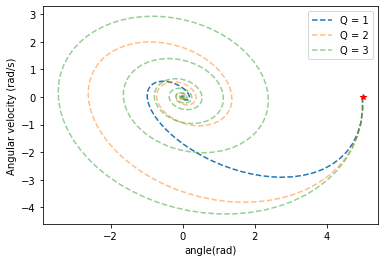

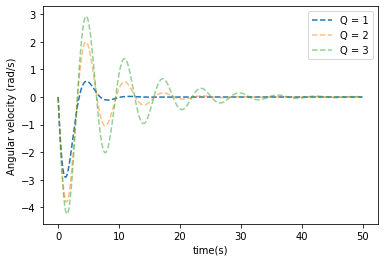

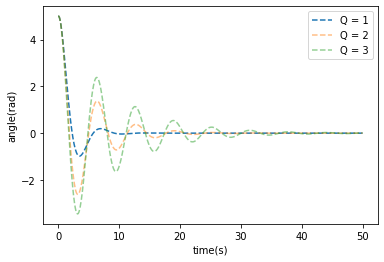

In [21]:

time_0 = 0 
time_max = 50
time_step = 1/10 # 10th part of a second 

position_0 = 5 # in meters difference from rest position
velocity_0 = 0        # angular velocity            

initCondn = [position_0, velocity_0]
tRange = [time_0, time_max, time_step]

dt = tRange[2]
time = np.arange(tRange[0], tRange[1] + dt , dt)

quality_factor = 1
position1, velocity1 = EulerODE(initCondn, tRange, rhs)

quality_factor = 2
position2, velocity2 = EulerODE(initCondn, tRange, rhs)

quality_factor = 3
position3, velocity3 = EulerODE(initCondn, tRange, rhs)

lable = label('Q = 1','angle(rad)','Angular velocity (rad/s)','--')
g3.newPlot(position1, velocity1,lable)
lable = label('Q = 2','angle(rad)','Angular velocity (rad/s)','--')
g3.multiPlot(position2, velocity2,lable)
lable = label('Q = 3','angle(rad)','Angular velocity (rad/s)','--')
g3.multiPlot(position3, velocity3,lable)
plt.plot(position_0,velocity_0,'*r')

lable = label('Q = 1','time(s)','Angular velocity (rad/s)','--')
g3.newPlot(time, velocity1,lable)
lable = label('Q = 2','time(s)','Angular velocity (rad/s)','--')
g3.multiPlot(time, velocity2,lable)
lable = label('Q = 3','time(s)','Angular velocity (rad/s)','--')
g3.multiPlot(time, velocity3,lable)

lable = label('Q = 1','time(s)','angle(rad)','--')
g3.newPlot(time, position1,lable)
lable = label('Q = 2','time(s)','angle(rad)','--')
g3.multiPlot(time, position2,lable)
lable = label('Q = 3','time(s)','angle(rad)','--')
g3.multiPlot(time, position3,lable)

#####Interactive solutions

In [22]:

def a(xk,vk,t):
  mass = mass_i.value #kg
  k = spring_const_i.value # spring constant
  b = 1/quality_factor_i.value
  return -1/mass* k* xk - b * vk


time_0 = 0 
time_max = 20
time_step = 1/10 # 10th part of a second 
tRange = [time_0, time_max, time_step]
dt = tRange[2]
time = np.arange(tRange[0], tRange[1] + dt , dt)

#--
# Defining the variables. 

#definations made for interactive plot.
def update_plot(mass,spring_const,quality_factor,position_0):

  initCondn = [position_0, velocity_0]
  position, velocity = EulerODE(initCondn, tRange, rhs)
  position_EC, velocity_EC = EulerCromerODE(initCondn, tRange, rhs)

  L = label('for EulerODE Q = {0}'.format(quality_factor),'Position (meters)','velocity (meters/sec)','-r')
  g3.multiPlot(position, velocity, L )
  plt.plot(position[0], velocity[0], '*r' )
  
  L = label('for EulerCromerODE Q = {0}'.format(quality_factor),'Position (meters)','velocity (meters/sec)','-k')
  g3.multiPlot(position_EC, velocity_EC, L )

#making slider 
mass_i = widgets.FloatSlider(min=0, max=10, value=1,step = 0.5 , description = 'Mass (kg) : ')
spring_const_i = widgets.FloatSlider(min=0, max=10, value=1,step = 0.5 , description = 'Spring Constant : ')
quality_factor_i = widgets.FloatSlider(min=0.1, max=3, value=1,step = 0.2 , description = 'Quality factor : ')
position_0_i = widgets.FloatSlider(min=0, max=10, value=1,step = 0.5 , description = 'Initial position from rest (meters) : ')
#Starting the intractive session
widgets.interactive(update_plot,mass = mass_i, spring_const =spring_const_i ,quality_factor = quality_factor_i,position_0=position_0_i)


interactive(children=(FloatSlider(value=1.0, description='Mass (kg) : ', max=10.0, step=0.5), FloatSlider(valu…

# The End 
To Open Lab 3
https://github.com/ashwin-r-k/Computational-Physics_3labs/blob/main/LAB_3.ipynb